In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('crime.csv', low_memory=False)

# Assign new values for the "HIERARCHY" column so that higher equals a more serious crime.
# Apply a lambda function to every value to swap from 1 being the most serious to 99 being the most serious.
df['HIERARCHY']=df.apply(lambda x: 99 - x['HIERARCHY'],axis=1)

# Find the 5 highest neighborhoods based on the sum of the crime level
new_df = df.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum().nlargest(5)

#Showing the 5 results
new_df.head(5)



INCIDENTNEIGHBORHOOD
Central Business District    379902.0
South Side Flats             276428.0
Carrick                      205259.0
East Liberty                 164872.0
Shadyside                    138581.0
Name: HIERARCHY, dtype: float64

<AxesSubplot:xlabel='INCIDENTNEIGHBORHOOD'>

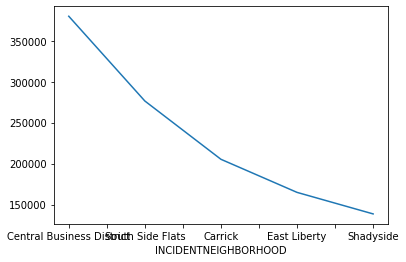

In [20]:
new_df.plot()